In [11]:
import matplotlib.pyplot as plt
from pandas.core.common import flatten
import copy
import numpy as np
import random
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedShuffleSplit
import wandb
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np



In [12]:
'''def prepare(batch_size=64):
    transform = transforms.Compose([
    transforms.Resize((256,256)), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
    classes = ('Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia')
    train_data_path = '/home/bincy/A2/CS-6910-A2/inaturalist_12K/train'
    test_data_path = '/home/bincy/A2/CS-6910-A2/inaturalist_12K/val'

    # Create datasets from the directories
    train_data_path = '/home/bincy/A2/CS-6910-A2/inaturalist_12K/train'
    test_data_path = '/home/bincy/A2/CS-6910-A2/inaturalist_12K/val'

    # Create datasets from the directories
    train_dataset = datasets.ImageFolder(train_data_path, transform=transform)
    test_dataset = datasets.ImageFolder(test_data_path, transform=transform)
    class_labels = np.array(train_dataset.targets)

    validation_size = 0.2

    stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=validation_size, random_state=42)


    train_indices, validation_indices = next(stratified_splitter.split(train_dataset, class_labels))

    # Create a balanced validation subset
    validation_targets = class_labels[validation_indices]
    unique_classes, class_counts = np.unique(validation_targets, return_counts=True)
    min_class_count = min(class_counts)

    balanced_validation_indices = []
    for cls in unique_classes:
        cls_indices = validation_indices[validation_targets == cls]
        balanced_validation_indices.extend(np.random.choice(cls_indices, min_class_count, replace=False))

    # Create subsets using the indices
    train_subset = torch.utils.data.Subset(train_dataset, train_indices)
    validation_subset = torch.utils.data.Subset(train_dataset, balanced_validation_indices)
    print(type(train_subset),type(validation_subset))
    #validation split ensuring equal represntation of classes

    class_labels = np.array(train_dataset.targets)

    validation_size = 0.2

    stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=validation_size, random_state=42)


    train_indices, validation_indices = next(stratified_splitter.split(train_dataset, class_labels))

    # Create a balanced validation subset
    validation_targets = class_labels[validation_indices]
    unique_classes, class_counts = np.unique(validation_targets, return_counts=True)
    min_class_count = min(class_counts)

    balanced_validation_indices = []
    for cls in unique_classes:
        cls_indices = validation_indices[validation_targets == cls]
        balanced_validation_indices.extend(np.random.choice(cls_indices, min_class_count, replace=False))

    # Create subsets using the indices
    train_subset = torch.utils.data.Subset(train_dataset, train_indices)
    validation_subset = torch.utils.data.Subset(train_dataset, balanced_validation_indices)
    print(type(train_subset),type(validation_subset))

# Now train_subset and validation_subset contain data with balanced class representation
  
    trainloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    validationloader = torch.utils.data.DataLoader(validation_subset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    print(type(trainloader))
    # Check images
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    print("the images batch",images.shape)

    print("a single item",images[3].shape)
    print("label of item",labels[3].item())
    #visualising
    img = images[3]
    print(type(img))
    npimg = img.numpy()
    print(npimg.shape)
    npimg = np.transpose(npimg, (1, 2, 0))
    print(npimg.shape)
    plt.figure(figsize = (4,4))
    plt.imshow(npimg)
    plt.title(classes[labels[3]])
    plt.show()
    imshow(torchvision.utils.make_grid(images))
    print(' '.join(classes[labels[j]] for j in range(batch_size)))

    return trainloader,validationloader,testloader
'''


'def prepare(batch_size=64):\n    transform = transforms.Compose([\n    transforms.Resize((256,256)), \n    transforms.ToTensor(),\n    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),\n    ])\n    classes = (\'Amphibia\', \'Animalia\', \'Arachnida\', \'Aves\', \'Fungi\', \'Insecta\', \'Mammalia\', \'Mollusca\', \'Plantae\', \'Reptilia\')\n    train_data_path = \'/home/bincy/A2/CS-6910-A2/inaturalist_12K/train\'\n    test_data_path = \'/home/bincy/A2/CS-6910-A2/inaturalist_12K/val\'\n\n    # Create datasets from the directories\n    train_data_path = \'/home/bincy/A2/CS-6910-A2/inaturalist_12K/train\'\n    test_data_path = \'/home/bincy/A2/CS-6910-A2/inaturalist_12K/val\'\n\n    # Create datasets from the directories\n    train_dataset = datasets.ImageFolder(train_data_path, transform=transform)\n    test_dataset = datasets.ImageFolder(test_data_path, transform=transform)\n    class_labels = np.array(train_dataset.targets)\n\n    validation_size = 0.2\n\n    stratifi

In [13]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

def prepare(batch_size=64, use_data_augmentation=False):
    # Common normalization and resize operations
    common_transforms = [
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]

    # Define transformations for the training data with optional augmentation
    if use_data_augmentation:
        train_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),  # Example augmentation
            transforms.RandomRotation(10),  # Example augmentation
            *common_transforms,
        ])
    else:
        train_transform = transforms.Compose(common_transforms)

    # Transformations for validation and test data (no augmentation)
    test_transform = transforms.Compose(common_transforms)

    train_data_path = '/home/agcl/bincy/CS 6910 A2/inaturalist_12K/train'
    test_data_path = '/home/agcl/bincy/CS 6910 A2/inaturalist_12K/val'

    # Load the training dataset with the train_transform
    full_train_dataset = datasets.ImageFolder(train_data_path, transform=train_transform)

    # Split the full training dataset into training and validation subsets
    validation_size = 0.2
    stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=validation_size, random_state=42)
    train_indices, validation_indices = next(stratified_splitter.split(np.array(full_train_dataset.targets), np.array(full_train_dataset.targets)))

    # Create subsets for training and validation
    train_subset = Subset(full_train_dataset, train_indices)
    validation_dataset = datasets.ImageFolder(train_data_path, transform=test_transform)  # Reload with test_transform
    validation_subset = Subset(validation_dataset, validation_indices)

    # Load the test dataset with the test_transform
    test_dataset = datasets.ImageFolder(test_data_path, transform=test_transform)

    # Create DataLoaders for training, validation, and test datasets
    trainloader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    validationloader = DataLoader(validation_subset, batch_size=batch_size, shuffle=False)
    testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return trainloader, validationloader, testloader



In [14]:
def imshow(img,figsize=(8,8)):
    plt.figure(figsize=figsize)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [15]:


class CNN(nn.Module):
    def __init__(self, num_classes=10, in_channels=3, num_filters=[32, 32, 32, 32, 32],kernel_size=3, pool_size=2,drop_conv=0.2, drop_dense=0.3,dense_neurons=100,activation="ReLU",activation_dense="ReLU",use_batch_norm=True, use_data_augmentation=True):
        super(CNN, self).__init__()
        self.conv_layers = nn.ModuleList()
        activations = {
        "ReLU": nn.ReLU(),
        "Tanh": nn.Tanh(),
        "GELU": nn.GELU(),
        "SiLU": nn.SiLU(), 
        "Mish": nn.Mish()}
        for out_channels in num_filters:
            kernel_size=kernel_size
            padding=kernel_size//2

            
            
            activation_function=activations.get(activation, nn.ReLU())
            activation_dense_function=activations.get(activation, nn.ReLU())

        # Get the
            self.conv_layers.append(
                nn.Sequential(
                    nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding),
                    #nn.ReLU(),
                    activation_function,
                    nn.MaxPool2d(pool_size),
                    nn.Dropout(drop_conv)  # Adding dropout with probability 0.2
                )
            )
            
            if use_batch_norm:
                self.conv_layers.append(nn.BatchNorm2d(out_channels))  # Batch normalization layer
            in_channels = out_channels
        
        # Define dense layers
            
        self.dense_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_filters[-1] * (256 // (pool_size**len(num_filters))) * (256 // (pool_size**len(num_filters))), dense_neurons),
            activation_dense_function,
            nn.Dropout(drop_dense),  # Adding dropout with probability 0.2
            nn.Linear(dense_neurons, num_classes)
        )
        
    def forward(self, x):
        # Pass input through convolutional layers
        for layer in self.conv_layers:
            x = layer(x)
        
        # Pass output through dense layers
        x = self.dense_layers(x)
        return x


# Instantiate the model
model = CNN()
print(model)


CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (5): BatchNorm2d(32, eps=1e-05, moment

In [16]:



def evaluation(dataloader,model):
    total, correct = 0, 0
    device = torch.device("cuda:0")
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss_fn = nn.CrossEntropyLoss()

        loss = loss_fn(outputs, labels)
                
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        
    return 100 * correct / total,loss.item()

In [17]:
def fit(config):
#def fit():
    
    wandb.login() 
    #wandb.init(project="CS6910 A2",name="part a")
    
    loss_epoch_arr = []
    train_accuracy_arr=[]
    validation_accuracy_arr=[]
    loss_epoch_val=[]
    # early stop 
    patience = 5  # Number of epochs to wait for improvement before stopping
    best_val_loss = float('inf')  # Initialize best validation loss
    best_val_acc = 0  # Optionally, you could also track best validation accuracy
    no_improvement_count = 0  # 
    activation = config['activation']
    activation_dense = config['activation_dense']
    n=config['filter']
   
    batch_size = config['batch_size']
    epochs = config['epochs']
    drop_conv=config['drop_conv']
    drop_dense=config['drop_dense']
    kernel_size=config['kernel_size']
    filter_mult=config['filter_mult']
    dense_neurons=config['dense']
    use_batch_norm=config['batch_normalization']
    use_data_augmentation=config['data_augmentation']
    trainloader,validationloader,testloader=prepare(batch_size,use_data_augmentation)
   
    device = torch.device("cuda:0")
    if filter_mult == 1:
        num_filters = [n, n, n, n, n]
    if filter_mult==2:
        num_filters = [n* (2 ** i) for i in range(5)]
    if filter_mult==0.5:
        num_filters = [n//(2 ** i) for i in range(5)]
    device = torch.device("cuda:0")
    net = CNN(activation_dense=activation_dense,num_filters=num_filters,drop_conv=drop_conv,drop_dense=drop_dense,use_batch_norm=use_batch_norm,use_data_augmentation=use_data_augmentation,dense_neurons=dense_neurons,kernel_size=kernel_size,activation=activation).to(device)
       
    print(net)
    loss_fn = nn.CrossEntropyLoss()
    opt = optim.Adam(net.parameters())
    n_iters = np.ceil(10000/batch_size)
  
    min_loss = 1000
    for epoch in range(epochs):

        for i, data in enumerate(trainloader, 0):

            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            opt.zero_grad()
            outputs = net(inputs)
            train_loss = loss_fn(outputs, labels)
            train_loss.backward()
            opt.step()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            if min_loss > train_loss.item():
                min_loss = train_loss.item()
                best_model = copy.deepcopy(net.state_dict())
                print('Min loss %0.2f' % min_loss)
                
            if i % 1000 == 0:
                print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, train_loss.item()))
            
        loss_epoch_arr.append(train_loss.item())
        train_accuracy,t_loss=evaluation(trainloader,net)
        model.eval()
        validation_accuracy,validation_loss=evaluation(validationloader,net)
        train_accuracy_arr.append(train_accuracy)
        validation_accuracy_arr.append(validation_accuracy)
        loss_epoch_val.append(validation_loss)
            
        print('Epoch: %d/%d, validayion acc: %0.2f,Train acc: %0.2f ,val loss: %0.2f, train loss: %0.2f'%(
            epoch, epochs, 
            validation_accuracy,train_accuracy,validation_loss,train_loss.item()))
        
        wandb.log({"accuracy_train": train_accuracy, "accuracy_validation": validation_accuracy, "loss_train": train_loss.item(), "loss_validation": validation_loss, 'epochs': epoch})
        if validation_loss < best_val_loss:
            best_val_loss = validation_loss
            best_val_acc = validation_accuracy  # Update best validation accuracy if tracking
            best_model = copy.deepcopy(net.state_dict())  # Save the best model state
            no_improvement_count = 0  # Reset counter
            print('Improvement found at epoch {}: validation loss: {}, validation accuracy: {}'.format(epoch, validation_loss, validation_accuracy))
        else:
            no_improvement_count += 1
            print('No improvement in epoch {}. Current validation loss: {}, Best validation loss: {}'.format(epoch, validation_loss, best_val_loss))

        # Early stopping check
        if no_improvement_count >= patience:
            print('No improvement in validation loss for {} consecutive epochs. Stopping training...'.format(patience))
            break  # Exit the training loop
    
        model.train()
        
        
    plt.plot(loss_epoch_arr)
    plt.show()
    plt.plot(range(1, epochs + 1), train_accuracy_arr, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), validation_accuracy_arr, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    best_model_accuracy,best_model_loss=evaluation(validationloader,net)
    print('validation acc from best model: %0.2f,val loss: %0.2f'%(best_model_accuracy,best_model_loss))

In [18]:

def train():
   with wandb.init() as run:
        run_name = f'epoch_{wandb.config.epochs}_acti_{wandb.config.activation}_acti_dense_{wandb.config.activation_dense}__batchsize_{wandb.config.batch_size}__kernel_size_{wandb.config.kernel_size}_denseneurons_{wandb.config.dense}_filter_mult_{wandb.config.filter_mult}__drop_conv_{wandb.config.drop_conv}__drop_dense_{wandb.config.drop_dense}_filter_{wandb.config.filter}_aug_{wandb.config.data_augmentation}_batch_norm_{wandb.config.batch_normalization}'
        wandb.run.name = run_name
        print(run_name)
        fit(wandb.config)
        wandb.run.save()


Create sweep with ID: 73dz9hxw
Sweep URL: https://wandb.ai/bincyantonym/CS6910%20A2/sweeps/73dz9hxw


wandb: Agent Starting Run: v46bgp17 with config:
wandb: 	activation: GELU
wandb: 	activation_dense: ReLU
wandb: 	batch_normalization: Yes
wandb: 	batch_size: 32
wandb: 	data_augmentation: Yes
wandb: 	dense: 1000
wandb: 	drop_conv: 0.2
wandb: 	drop_dense: 0.3
wandb: 	epochs: 30
wandb: 	filter: 32
wandb: 	filter_mult: 2
wandb: 	kernel_size: 3
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


epoch_30_acti_GELU_acti_dense_ReLU__batchsize_32__kernel_size_3_denseneurons_1000_filter_mult_2__drop_conv_0.2__drop_dense_0.3_filter_32_aug_Yes_batch_norm_Yes
CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): GELU(approximate='none')
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): GELU(approximate='none')
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

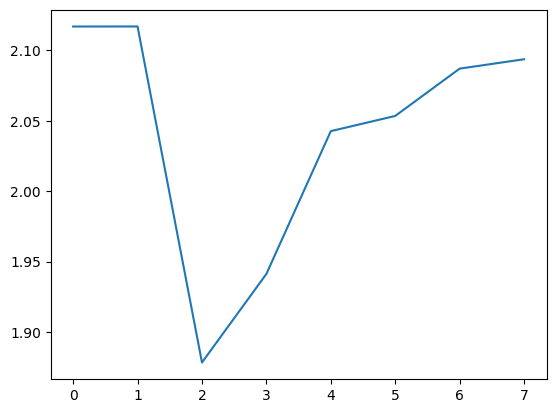

Traceback (most recent call last):
  File "/tmp/ipykernel_59846/571027595.py", line 6, in train
    fit(wandb.config)
  File "/tmp/ipykernel_59846/3001585145.py", line 101, in fit
    plt.plot(range(1, epochs + 1), train_accuracy_arr, label='Training Accuracy')
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3590, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 1724, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 303, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 499, in _plot_args
    raise ValueError(f"x and y must have same 

accuracy_train,▁▄▃▅▆█▇█
accuracy_validation,▁▃▂▅▅▆▆█
epochs,▁▂▃▄▅▆▇█
loss_train,██▁▃▆▆▇▇
loss_validation,█▄▁▆▂▅▆█
accuracy_train,27.35342
accuracy_validation,27.9
epochs,7
loss_train,2.09366
loss_validation,2.80552


Run v46bgp17 errored:
Traceback (most recent call last):
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 308, in _run_job
    self._function()
  File "/tmp/ipykernel_59846/571027595.py", line 6, in train
    fit(wandb.config)
  File "/tmp/ipykernel_59846/3001585145.py", line 101, in fit
    plt.plot(range(1, epochs + 1), train_accuracy_arr, label='Training Accuracy')
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3590, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 1724, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 303, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


epoch_30_acti_SiLU_acti_dense_GELU__batchsize_32__kernel_size_3_denseneurons_1000_filter_mult_0.5__drop_conv_0.2__drop_dense_0.3_filter_32_aug_Yes_batch_norm_Yes
CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): SiLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sequential(
      (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): SiLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Sequential(
      (0): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): SiLU()
      (2): Max

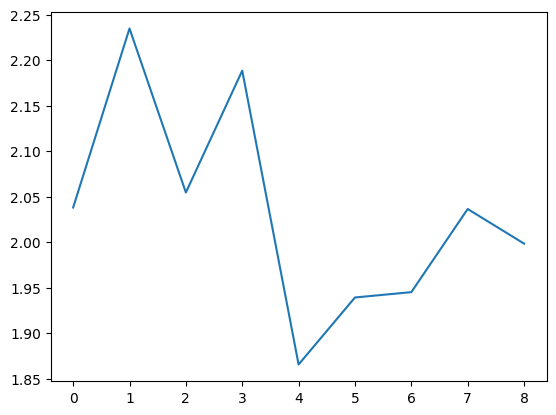

Traceback (most recent call last):
  File "/tmp/ipykernel_59846/571027595.py", line 6, in train
    fit(wandb.config)
  File "/tmp/ipykernel_59846/3001585145.py", line 101, in fit
    plt.plot(range(1, epochs + 1), train_accuracy_arr, label='Training Accuracy')
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3590, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 1724, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 303, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 499, in _plot_args
    raise ValueError(f"x and y must have same 

accuracy_train,▁▄▄▆▇▇▆██
accuracy_validation,▁▄▄▆█▇▇██
epochs,▁▂▃▄▅▅▆▇█
loss_train,▄█▅▇▁▂▃▄▄
loss_validation,▃█▆▁▃▄▆▇▂
accuracy_train,30.29129
accuracy_validation,28.15
epochs,8
loss_train,1.99859
loss_validation,2.06778


Run zje5i162 errored:
Traceback (most recent call last):
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 308, in _run_job
    self._function()
  File "/tmp/ipykernel_59846/571027595.py", line 6, in train
    fit(wandb.config)
  File "/tmp/ipykernel_59846/3001585145.py", line 101, in fit
    plt.plot(range(1, epochs + 1), train_accuracy_arr, label='Training Accuracy')
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3590, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 1724, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 303, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


epoch_30_acti_GELU_acti_dense_SiLU__batchsize_32__kernel_size_3_denseneurons_256_filter_mult_1__drop_conv_0.2__drop_dense_0.2_filter_32_aug_Yes_batch_norm_Yes
CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): GELU(approximate='none')
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): GELU(approximate='none')
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
    )
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

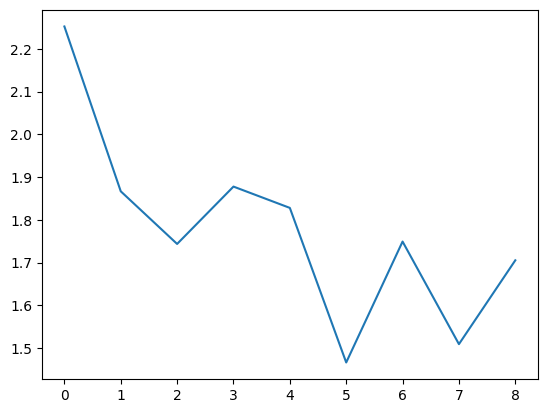

Traceback (most recent call last):
  File "/tmp/ipykernel_59846/571027595.py", line 6, in train
    fit(wandb.config)
  File "/tmp/ipykernel_59846/3001585145.py", line 101, in fit
    plt.plot(range(1, epochs + 1), train_accuracy_arr, label='Training Accuracy')
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3590, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 1724, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 303, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 499, in _plot_args
    raise ValueError(f"x and y must have same 

accuracy_train,▁▂▃▄▅▆▇██
accuracy_validation,▁▁▄▅▆▇▇█▇
epochs,▁▂▃▄▅▅▆▇█
loss_train,█▅▃▅▄▁▄▁▃
loss_validation,█▇▃▁▆▆▄▅▄
accuracy_train,46.14327
accuracy_validation,36.15
epochs,8
loss_train,1.70532
loss_validation,1.86759


Run a8b1p5gp errored:
Traceback (most recent call last):
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/wandb/agents/pyagent.py", line 308, in _run_job
    self._function()
  File "/tmp/ipykernel_59846/571027595.py", line 6, in train
    fit(wandb.config)
  File "/tmp/ipykernel_59846/3001585145.py", line 101, in fit
    plt.plot(range(1, epochs + 1), train_accuracy_arr, label='Training Accuracy')
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3590, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_axes.py", line 1724, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/agcl/anaconda3/envs/A2/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 303, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


epoch_30_acti_SiLU_acti_dense_GELU__batchsize_32__kernel_size_5_denseneurons_256_filter_mult_0.5__drop_conv_0.1__drop_dense_0.3_filter_32_aug_Yes_batch_norm_Yes
CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): SiLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.1, inplace=False)
    )
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sequential(
      (0): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): SiLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.1, inplace=False)
    )
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Sequential(
      (0): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): SiLU()
      (2): MaxP

In [19]:
sweep_config = {
  "name": "2080 Random sweep 30 [1]",
  "metric": {
      "name": "accuracy_validation",
      "goal": "maximize"
  },
  "method": "random",
  "parameters": {
        "epochs": {
            "values": [30]
        },
        "batch_size": {
            "values": [32]
        },
        "filter":{
            "values":[32]
        },
        "kernel_size":{
            "values":[3,5]
        },
        "drop_conv": {
            "values": [0.1,0,0.2]
        },
        "drop_dense": {
            "values": [0.2,0.3]
        },
        "filter_mult": {
            "values": [1,2,0.5]
        },
        "activation_dense": {
            "values": ["ReLU","GELU","SiLU"]  # Specify activation functions as strings
        },
        "activation": {
            "values": ["ReLU","GELU","SiLU"]  # Specify activation functions as strings
        },
        "dense": {
            "values": [256,500,1000]  # Specify activation functions as strings
        },
        "data_augmentation": {"values": ["Yes"]},
        "batch_normalization": {"values": ["Yes"]},
    }
}
sweep_id = wandb.sweep(sweep_config, project="CS6910 A2")
wandb.agent(sweep_id, function = train,count=30)
wandb.finish()